In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.shape

(768, 9)

In [9]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [10]:

(df == 0).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [11]:

cols_with_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)


print(df.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [12]:
df.fillna(df.median(), inplace=True)


print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


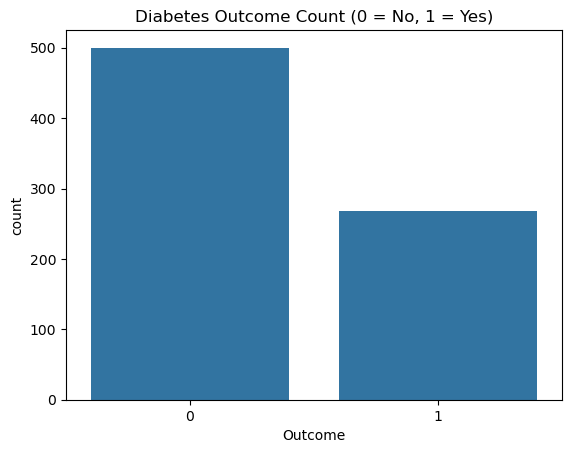

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [13]:
sns.countplot(x="Outcome", data=df)
plt.title("Diabetes Outcome Count (0 = No, 1 = Yes)")
plt.show()

print(df["Outcome"].value_counts(normalize=True))

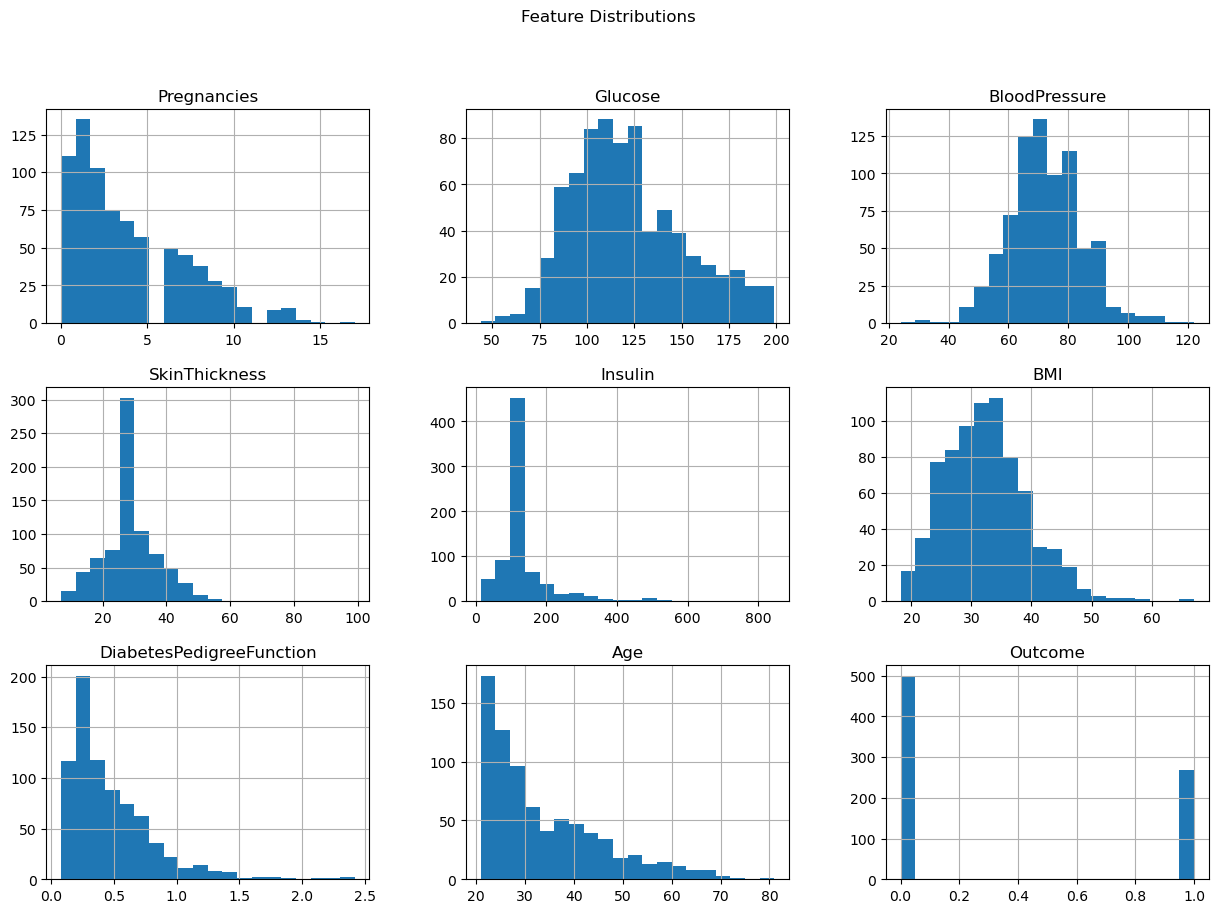

In [14]:
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()

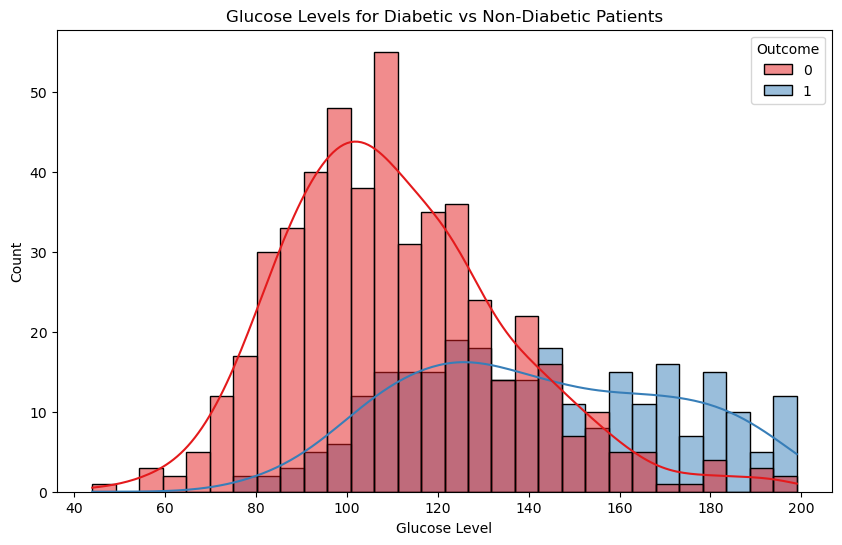

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Glucose", hue="Outcome", bins=30, kde=True, palette="Set1")
plt.title("Glucose Levels for Diabetic vs Non-Diabetic Patients")
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.show()

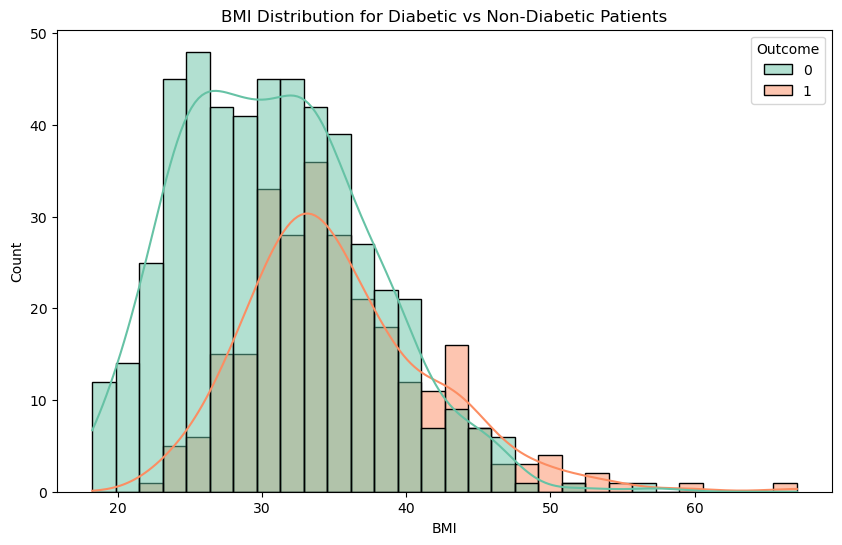

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="BMI", hue="Outcome", bins=30, kde=True, palette="Set2")
plt.title("BMI Distribution for Diabetic vs Non-Diabetic Patients")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()


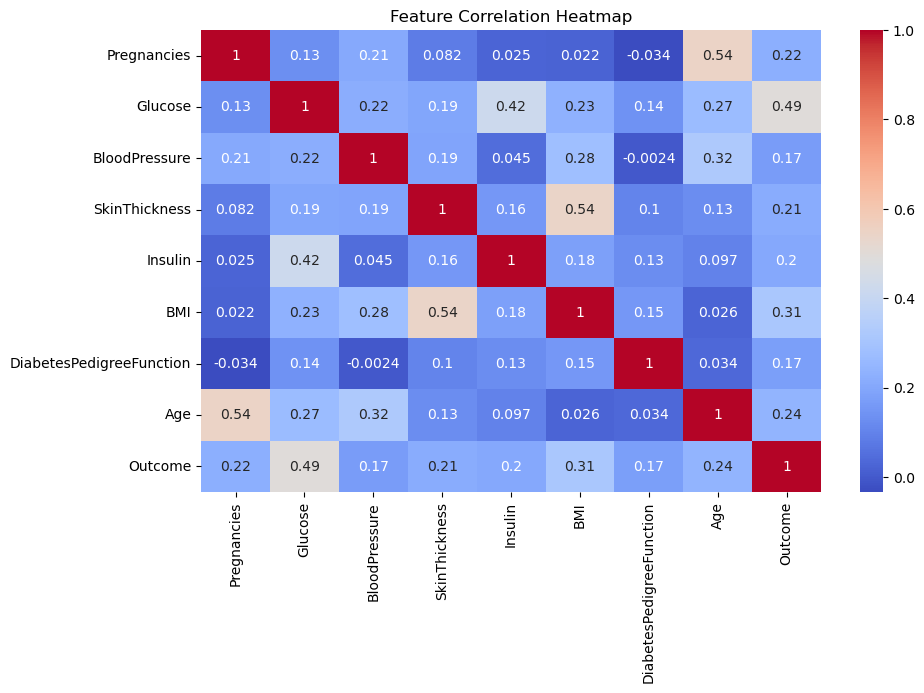

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


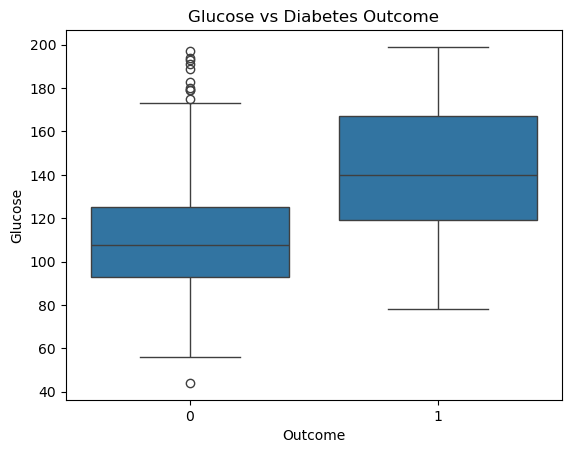

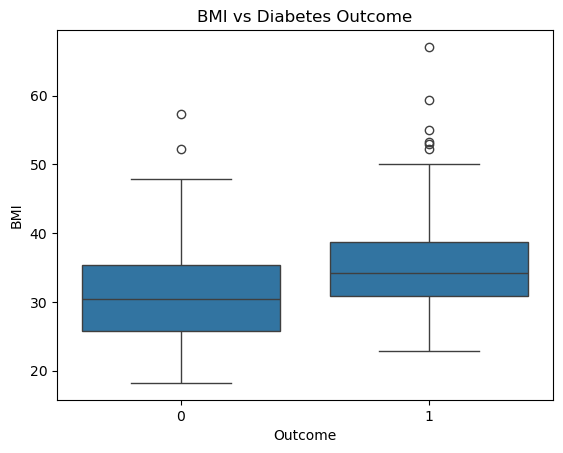

In [18]:
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Glucose vs Diabetes Outcome")
plt.show()

sns.boxplot(x="Outcome", y="BMI", data=df)
plt.title("BMI vs Diabetes Outcome")
plt.show()


Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


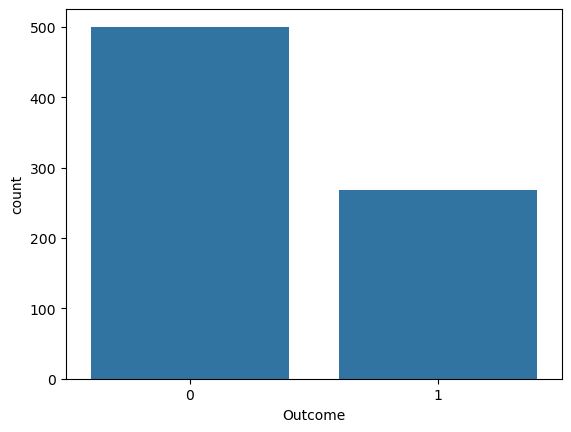

In [19]:
sns.countplot(x="Outcome", data=df)
print(df["Outcome"].value_counts(normalize=True))


In [20]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



Accuracy: 0.7402597402597403
Confusion Matrix:
 [[83 17]
 [23 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       100
           1       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154



In [26]:
import joblib

# assuming your trained model is named "model"
joblib.dump(rf_model, "diabetes_model.joblib")


['diabetes_model.joblib']